This Notebook can be used to reproduce Table 1, Figure 4, Figure 5 and Figure 6 of the paper The Chicago Hardship Index: An Introduction to Urban Inequity.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plotting library

<h2>1. Table 1 (Raw Data and 5 Number Summaries)</h2>
The hardship index
is the mean of the 6 raw indicator estimates after each indicator has been
normalized and then scaled from 0-100. A higher hardship index value indicates greater
hardship. The 6 raw indicator estimates are complicated by time variation over 5 year
periods (US Census Bureau 2008) and geographical boundary approximation (Great Cities
Institute 2019).

<ul>
    <li> HI = hardship index </li>
    <li> UNEMP = % of community age 16 and older who are unemployed. </li>
     <li> NOHS = % of community age 25 and older without a high school diploma. </li>
         <li> DEP = % of community who are dependent (under age 18 or over age 64). </li>
             <li> HOUS= % of community with overcrowded housing (more than 1 occupant per room).</li>
                 <li> POV = % below federal poverty line
    <li> INC = per capita income.</li>
    
 Datafile:  'HI20142017.xlsx'
             
 Data Source: https://greatcities.uic.edu/wp-content/uploads/2016/07/GCI-Hardship-Index-Fact-SheetV2.pdf (2010-2014) https://greatcities.uic.edu/wp-content/uploads/2019/12/Hardship-Index-Fact-Sheet-2017-ACS-Final-1.pdf (2013-2017).   

1a) Upload Data

In [2]:
raw_hardship=pd.read_excel('master.xlsx')
raw_hardship.head(2)

,Community,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14,HI17,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17
0,Rogers Park,39.7,9.3,16.4,27.2,7.1,24.0,24323,39.4,7.7,9.5,26.2,6.6,22.6,25874
1,West Ridge,44.3,10.0,17.1,38.3,7.6,17.4,23498,47.3,8.6,11.7,37.9,7.7,16.8,24721


1b) Let's separate the 2014 and 2017 hardship index (HI) data into two dataframes called "dfHI14" and "dfHI17". The column names will reflect the year.

In [3]:
dfHI14=raw_hardship[["Community","HI14","UNEMP14","NOHS14","DEP14","HOUS14","POV14","INC14"]]
dfHI14 = dfHI14.rename(columns = {'Community':'Community14'})
dfHI17=raw_hardship[["Community","HI17","UNEMP17","NOHS17","DEP17","HOUS17","POV17","INC17"]]
dfHI17 = dfHI17.rename(columns = {'Community':'Community17'})

1c) Let's check the 2014 data.

In [4]:
dfHI14.head(2)

,Community14,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14
0,Rogers Park,39.7,9.3,16.4,27.2,7.1,24.0,24323
1,West Ridge,44.3,10.0,17.1,38.3,7.6,17.4,23498


1d) Let's also check the 2017 data.

In [5]:
dfHI17.head(2)

,Community17,HI17,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17
0,Rogers Park,39.4,7.7,9.5,26.2,6.6,22.6,25874
1,West Ridge,47.3,8.6,11.7,37.9,7.7,16.8,24721


<h3> 5 Number Summaries

<h4>HOUS

In [6]:
x=dfHI17["HOUS17"]
import numpy
print(numpy.min(x))
print(numpy.max(x))
print(numpy.std(x))
print(numpy.mean(x))
print(numpy.median(x))

0.3
13.6
2.87070805717617
4.114285714285714
3.3


To get the other 5 Number summaries, replace "HOUS17" with "HI17", "NOHS17", "POV17" or "INC17"

<h2> 2. Figure 4</h2>
: Geographic plot of Chicago’s 77 community areas with marker color (blue or
red) indicating k-means bi-clustering based only on the 6 standardized economic hardship
indicators. Affluent community areas such as the Loop (central business district), Near
North Side (which includes the “Gold Coast”), and Hyde Park (site of the University of
Chicago) appear in blue. Lower-income communities with a history of injustices, including Woodlawn, Englewood, and Austin, appear in red. Marker sizes are proportional to
homicide counts, with actual numbers in parentheses following named community areas.

Datafile:  'standardizedindicators.xlsx'


2a) Import library for k-means clustering.

In [7]:
import sklearn
from sklearn.cluster import KMeans

2b) Read standardized hardship index and homicde data.

In [8]:
hom_df = pd.read_excel('standardizedindicators.xlsx')
hom_df.head(2)

,Community,index,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14,HI17,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17,HOM14,HOM17,LAT,LON
0,Albany Park,13,47.0,-0.705481,0.667993,-0.470891,1.42992,-0.353466,-0.165118,45.7,-0.706842,0.506067,-0.530539,1.562581,-0.418499,-0.183089,2,1,41.96823,-87.72421
1,Archer Heights,56,54.4,-0.193683,1.136956,0.471085,1.51857,-0.672245,-0.605100,56.1,-0.442634,1.090575,0.742190,1.945762,-0.473646,-0.607925,0,3,41.81093,-87.72677


2c) Create dataframe with just HI and HOM 2017 info



In [9]:
HIHOM=hom_df[["UNEMP17","NOHS17","DEP17","HOUS17","POV17","INC17"]]
HIHOM.head()

,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17
0,-0.706842,0.506067,-0.530539,1.562581,-0.418499,-0.183089
1,-0.442634,1.090575,0.742190,1.945762,-0.473646,-0.607925
2,-0.128101,2.243355,0.773232,0.552377,1.575995,-0.574983
3,0.035456,-0.257040,0.229994,-0.283653,-0.896442,-0.290469
4,1.054544,0.018978,0.586979,-0.771338,0.629300,-0.609312


2d) Use the KMeans() function to make n_clusters=2 clusters and get the labels indicating which cluster each point belongs to.

In [10]:
# Fit the k means model
k_means = KMeans(init="k-means++", n_clusters=2, n_init=2)
k_means.fit(HIHOM)
#Get Labels
k_means_labels = k_means.labels_
k_means_labels

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

2e) Add the labels to hom_df

In [11]:
hom_df["CLASS"]=k_means_labels
hom_df.head(2)

,Community,index,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14,HI17,...,NOHS17,DEP17,HOUS17,POV17,INC17,HOM14,HOM17,LAT,LON,CLASS
0,Albany Park,13,47.0,-0.705481,0.667993,-0.470891,1.42992,-0.353466,-0.165118,45.7,...,0.506067,-0.530539,1.562581,-0.418499,-0.183089,2,1,41.96823,-87.72421,1
1,Archer Heights,56,54.4,-0.193683,1.136956,0.471085,1.51857,-0.672245,-0.605100,56.1,...,1.090575,0.742190,1.945762,-0.473646,-0.607925,0,3,41.81093,-87.72677,1


2f) Create a scatter plot which shows the classes with homicide counts for select communities.

No handles with labels found to put in legend.


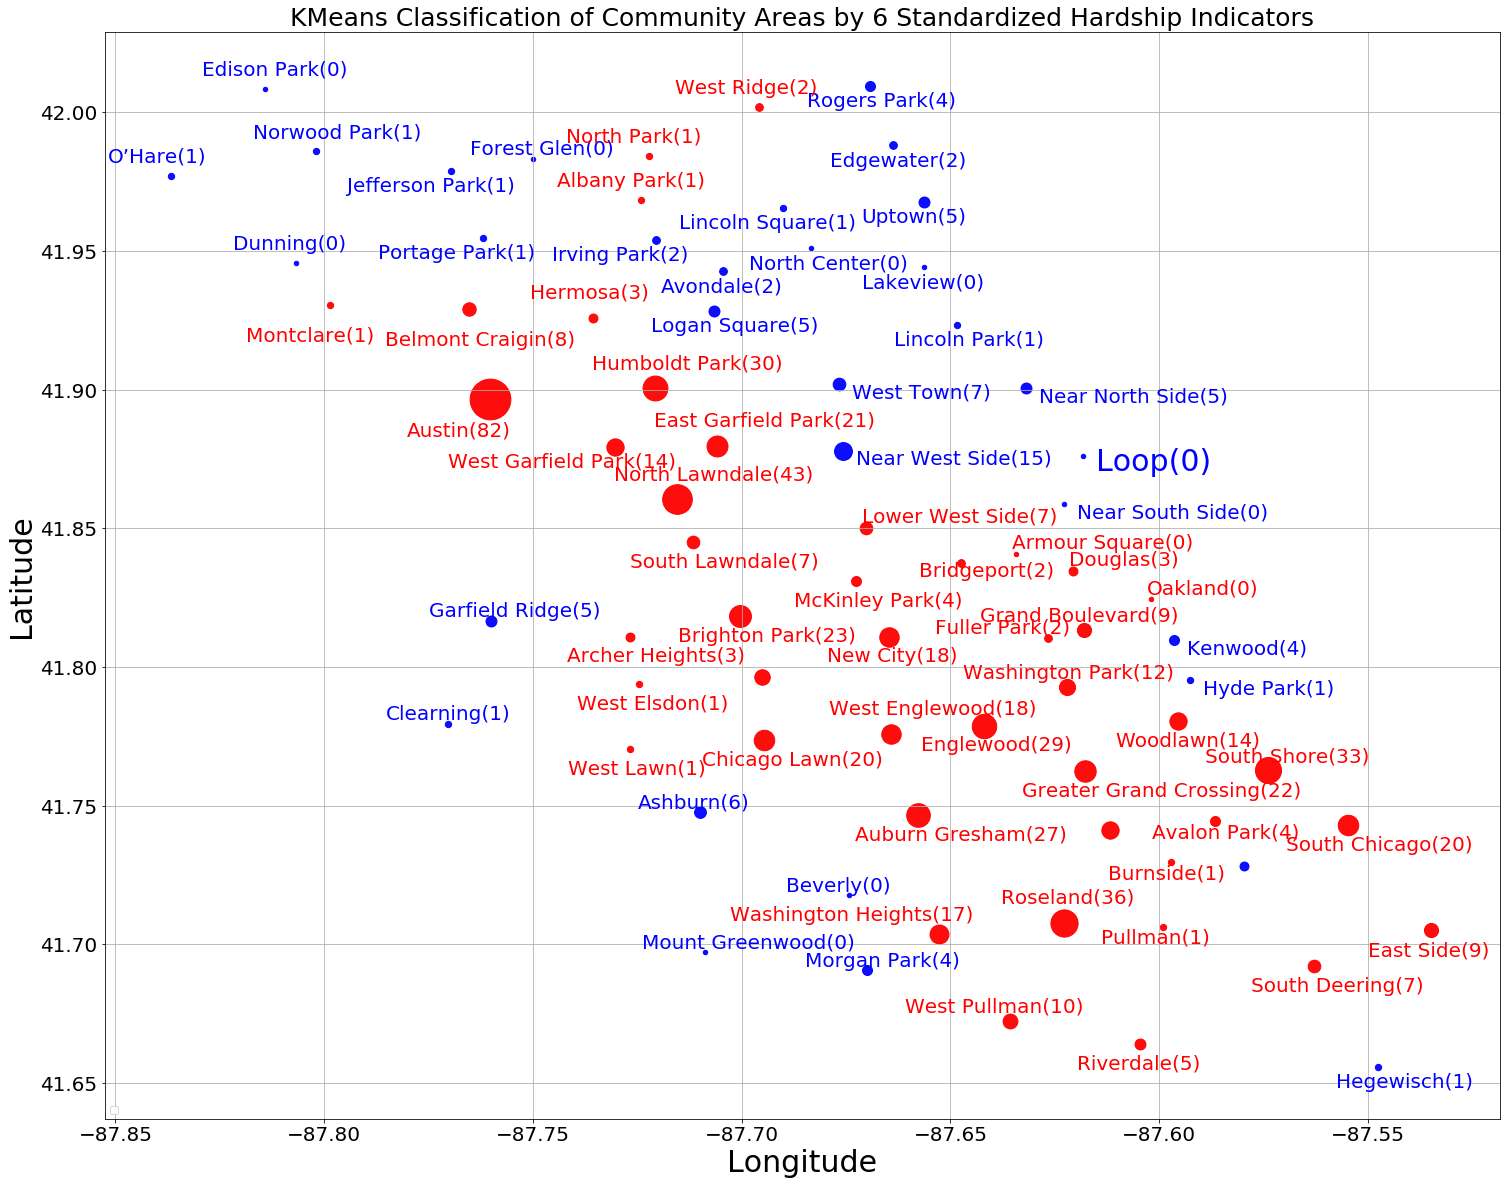

In [12]:
fig=plt.figure(figsize=(25,20))

for i in hom_df.index:
    if hom_df.loc[i,"CLASS"]==0:   #toggle class (0 or 1) if "Loop" does not appear on the map
        plt.scatter(hom_df.loc[i,'LON'], hom_df.loc[i,'LAT'],s=20*hom_df.loc[i,'HOM17']+20,color='b', alpha=0.95)
        if hom_df.loc[i,"Community"] in ["Loop"]:
            plt.gca().text(hom_df.loc[i,'LON']+.003, hom_df.loc[i,'LAT']-.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='blue', size=30)
        if hom_df.loc[i,"Community"] in ["Hyde Park","Near West Side","Kenwood","Near North Side","Near South Side","West Town"]:
            plt.gca().text(hom_df.loc[i,'LON']+.003, hom_df.loc[i,'LAT']-.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='blue', size=20)
        if hom_df.loc[i,"Community"] in ["Lincoln Park","Lakeview","Uptown","Edgewater","Rogers Park","Logan Square","Avondale","North Center"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']-.0075, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='blue', size=20)
        if hom_df.loc[i,"Community"] in ["Lincoln Square","Irving Park","Portage Park","Jefferson Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025, hom_df.loc[i,'LAT']-.0075, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='blue', size=20)
        if hom_df.loc[i,"Community"] in ["Dunning","O’Hare","Edison Park","Norwood Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='blue', size=20)
        if hom_df.loc[i,"Community"] in ["Forest Glen","Garfield Ridge","Clearning","Ashburn","Beverly","Mount Greenwood","Morgan Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.0015, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='blue', size=20)
    
        
        
        if hom_df.loc[i,"Community"] in ["Hegewisch"]:
            plt.gca().text(hom_df.loc[i,'LON']-.01, hom_df.loc[i,'LAT']-.0075, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='blue', size=20)
    
    
    else:
        plt.scatter(hom_df.loc[i,'LON'], hom_df.loc[i,'LAT'],s=20*hom_df.loc[i,'HOM17']+20,color='r', alpha=0.95)
        if hom_df.loc[i,"Community"] in ["Austin","Belmont Craigin","Montclare"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']-.013, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Woodlawn","Englewood","Chicago Lawn","South Lawndale","McKinley Park","Brighton Park","Archer Heights","West Elsdon","West Lawn","New City","Greater Grand Crossing","Auburn Gresham","South Chicago","East Side","South Deering","Riverdale"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']-.009, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Avalon Park","Burnside","Pullman"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']-.006,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Roseland","North Lawndale","East Garfield Park","Hermosa","West Englewood","Humboldt Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.007,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["West Garfield Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.04,hom_df.loc[i,'LAT']-.007,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Lower West Side","Oakland","Douglas","Armour Square"]:
            plt.gca().text(hom_df.loc[i,'LON']-.001,hom_df.loc[i,'LAT']+.002,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Bridgeport"]:
            plt.gca().text(hom_df.loc[i,'LON']-.01,hom_df.loc[i,'LAT']-.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["South Shore"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Washington Park","West Pullman","Grand Boulevard"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Fuller Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.027,hom_df.loc[i,'LAT']+.002,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["Washington Heights"]:
            plt.gca().text(hom_df.loc[i,'LON']-.05,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)
        if hom_df.loc[i,"Community"] in ["West Ridge","North Park","Albany Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HOM17'])+')',color='red', size=20)

#plt.gca().set_facecolor('lightgray')
plt.gca().grid()
plt.yticks(fontsize=20) 
plt.xticks(fontsize=20)
#title
plt.title('KMeans Classification of Community Areas by 6 Standardized Hardship Indicators',size=25)
plt.xlabel("Longitude",size=30)
plt.ylabel("Latitude",size=30)
plt.legend(loc="lower left")
fig.savefig("Fig4.png") 
#show the plot
plt.show()

<h2> 3. Figure 5</h2>
This visualization is more accessible and transparent than Figure 4. Marker size
and labeled values indicate the 2017 homicide count. Homicide-free communities are indicated in blue. The 2013-2017 hardship index is listed next to the name of each community
area.

Datafile: 'standardizedindicators.xlsx' (same as Figure 4)

3a) Read data.

In [13]:
hom_df = pd.read_excel('standardizedindicators.xlsx')
hom_df.head(2)

,Community,index,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14,HI17,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17,HOM14,HOM17,LAT,LON
0,Albany Park,13,47.0,-0.705481,0.667993,-0.470891,1.42992,-0.353466,-0.165118,45.7,-0.706842,0.506067,-0.530539,1.562581,-0.418499,-0.183089,2,1,41.96823,-87.72421
1,Archer Heights,56,54.4,-0.193683,1.136956,0.471085,1.51857,-0.672245,-0.605100,56.1,-0.442634,1.090575,0.742190,1.945762,-0.473646,-0.607925,0,3,41.81093,-87.72677


3b) Create a Create a scatter plot which shows the classes with homicide counts for select communities.

No handles with labels found to put in legend.


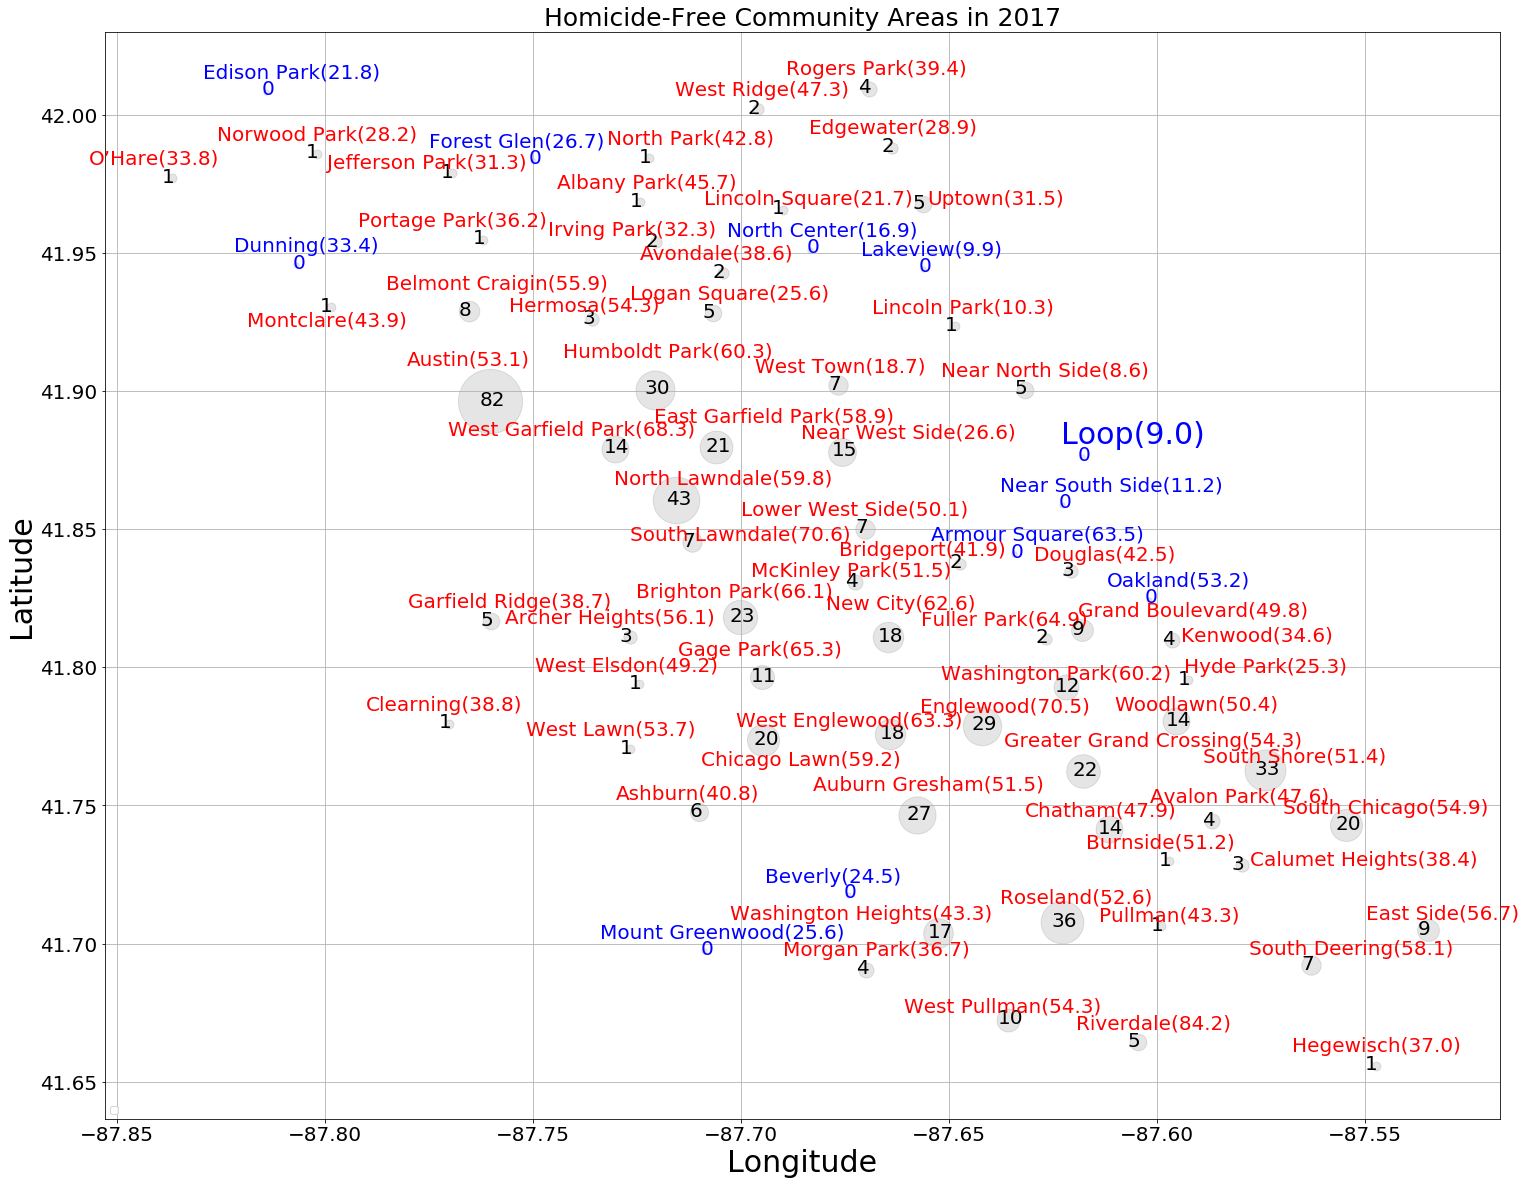

In [14]:
fig=plt.figure(figsize=(25,20))

for i in hom_df.index:
    if hom_df.loc[i,"HOM17"]==0:   
        plt.scatter(hom_df.loc[i,'LON'], hom_df.loc[i,'LAT'],s=30,color='b', alpha=0.1)
        plt.gca().text(hom_df.loc[i,'LON']-.001, hom_df.loc[i,'LAT']-.001,hom_df.loc[i,'HOM17'],color='b', alpha=1,size=20)
        if hom_df.loc[i,"Community"] in ["Loop"]:
            plt.gca().text(hom_df.loc[i,'LON']-.005, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=30)
        elif hom_df.loc[i,"Community"] in ["Hyde Park","Near West Side","Kenwood","Near North Side","West Town"]:
            plt.gca().text(hom_df.loc[i,'LON']+.003, hom_df.loc[i,'LAT']-.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Lincoln Park","Uptown","Edgewater","Rogers Park","Logan Square","Avondale"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']-.0075, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Lincoln Square","Irving Park","Portage Park","Jefferson Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025, hom_df.loc[i,'LAT']-.0075, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Dunning","O’Hare","Edison Park","Norwood Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
               
        elif hom_df.loc[i,"Community"] in ["Garfield Ridge","Clearning","Ashburn","Morgan Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.0015, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Hegewisch"]:
            plt.gca().text(hom_df.loc[i,'LON']-.01, hom_df.loc[i,'LAT']-.0075, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Forest Glen"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["North Center"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Oakland"]:
            plt.gca().text(hom_df.loc[i,'LON']-.01, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Mount Greenwood"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Lakeview"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        elif hom_df.loc[i,"Community"] in ["Near South Side"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
      
        elif hom_df.loc[i,"Community"] in ["Edison Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015, hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='green', size=20)
        elif hom_df.loc[i,"Community"] in ["Beverly"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02, hom_df.loc[i,'LAT']+.0045, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        
        
        else:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='blue', size=20)
        
    else:
        plt.scatter(hom_df.loc[i,'LON'], hom_df.loc[i,'LAT'],s=30+50*hom_df.loc[i,'HOM17'],color='k', alpha=0.1)
        plt.gca().text(hom_df.loc[i,'LON']-.0025, hom_df.loc[i,'LAT']-.0015,hom_df.loc[i,'HOM17'],color='k', alpha=1,size=20)
        if hom_df.loc[i,"Community"] in ["Austin"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.013, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Belmont Craigin"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.0078, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Chicago Lawn"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']-.009, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Pullman"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.002,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Roseland"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.007,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Garfield Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.04,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Oakland","Armour Square"]:
            plt.gca().text(hom_df.loc[i,'LON']-.001,hom_df.loc[i,'LAT']+.002,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Bridgeport"]:
            plt.gca().text(hom_df.loc[i,'LON']-.029,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["South Shore"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Pullman"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Washington Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
       
        elif hom_df.loc[i,"Community"] in ["Washington Heights"]:
            plt.gca().text(hom_df.loc[i,'LON']-.05,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Ridge","Albany Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["North Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.01,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Lincoln Square"]:
            plt.gca().text(hom_df.loc[i,'LON']-.019,hom_df.loc[i,'LAT']+.002,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Hermosa"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Montclare"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']-.007, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Town"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Near West Side"]:
            plt.gca().text(hom_df.loc[i,'LON']-.01,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Lower West Side"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["North Lawndale"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.006,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Douglas"]:
            plt.gca().text(hom_df.loc[i,'LON']-.009,hom_df.loc[i,'LAT']+.004,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Archer Heights"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["New City"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.01, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["South Chicago"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.004, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Lawn"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Kenwood"]:
            plt.gca().text(hom_df.loc[i,'LON']+.002,hom_df.loc[i,'LAT'], hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Grand Boulevard"]:
            plt.gca().text(hom_df.loc[i,'LON']-.001,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Fuller Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Hyde Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.001,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Calumet Heights"]:
            plt.gca().text(hom_df.loc[i,'LON']+.002,hom_df.loc[i,'LAT'],hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Jefferson Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.0015,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Uptown"]:
            plt.gca().text(hom_df.loc[i,'LON']+.001,hom_df.loc[i,'LAT'],hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Englewood"]:
            plt.gca().text(hom_df.loc[i,'LON']-.037,hom_df.loc[i,'LAT']+.003,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Portage Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.03,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Irving Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.026, hom_df.loc[i,'LAT']+.0025, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Humboldt Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.022,hom_df.loc[i,'LAT']+.012,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Brighton Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.007, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["South Lawndale"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.001, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["McKinley Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.002, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["West Elsdon"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Gage Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.008, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Woodlawn"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.004, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Englewood"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Greater Grand Crossing"]:
            plt.gca().text(hom_df.loc[i,'LON']-.019,hom_df.loc[i,'LAT']+.009, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Auburn Gresham"]:
            plt.gca().text(hom_df.loc[i,'LON']-.025,hom_df.loc[i,'LAT']+.009, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Avalon Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.007,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Burnside"]:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["East Side","South Deering"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.004, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Riverdale"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["Norwood Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.024,hom_df.loc[i,'LAT']+.005, hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        elif hom_df.loc[i,"Community"] in ["East Garfield Park"]:
            plt.gca().text(hom_df.loc[i,'LON']-.015,hom_df.loc[i,'LAT']+.009,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
       
        else:
            plt.gca().text(hom_df.loc[i,'LON']-.02,hom_df.loc[i,'LAT']+.005,hom_df.loc[i,'Community']+'('+str(hom_df.loc[i,'HI17'])+')',color='red', size=20)
        
#plt.gca().set_facecolor('lightgray')
plt.gca().grid()
plt.yticks(fontsize=20) 
plt.xticks(fontsize=20)
#title
plt.title('Homicide-Free Community Areas in 2017',size=25)
plt.xlabel("Longitude",size=30)
plt.ylabel("Latitude",size=30)
plt.legend(loc="lower left")
fig.savefig("Fig5.png") 
#show the plot
plt.show()

<h2>4. Figure 6</h2>
 Homicide counts vs. Hardship index. 2010-2014 hardship index and 2014 homicide count in black; 2013-2017 hardship index and 2017 homicide count in red.
 
 Datafile: 'HIHOM20142017.xlsx'

4a) Read Data.

In [15]:
raw_hardship=pd.read_excel('HIHOM20142017.xlsx')
raw_hardship.head(1)

,Community,index,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14,HI17,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17,HOM14,HOM17
0,Rogers Park,0,39.7,9.3,16.4,27.2,7.1,24.0,24323,39.4,7.7,9.5,26.2,6.6,22.6,25874,8,4


4b) Let's separate the 2014 and 2017 hardship index (HI) data into two dataframes called "HI14" and "HI17". The column names will reflect the year.

In [16]:
HI14=raw_hardship[["Community","HI14","UNEMP14","NOHS14","DEP14","HOUS14","POV14","INC14","HOM14"]]
HI14 = HI14.rename(columns = {'Community':'Community14'})
HI17=raw_hardship[["Community","HI17","UNEMP17","NOHS17","DEP17","HOUS17","POV17","INC17","HOM17"]]
HI17 = HI17.rename(columns = {'Community':'Community17'})
HI14.head(2)

,Community14,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14,HOM14
0,Rogers Park,39.7,9.3,16.4,27.2,7.1,24.0,24323,8
1,West Ridge,44.3,10.0,17.1,38.3,7.6,17.4,23498,3


In [17]:
HI17.head(2)

,Community17,HI17,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17,HOM17
0,Rogers Park,39.4,7.7,9.5,26.2,6.6,22.6,25874,4
1,West Ridge,47.3,8.6,11.7,37.9,7.7,16.8,24721,2


4c) In the next cell we'll define a function

makescatterplot(HI14,HI17,community_list,show_all,index1,index2,xaxislabel,yaxislabel,xrange,title)

which uses the data in HI14 and HI17 to makes scatterplots of (index1,index2). Brief explanation or examples of all the inputs to the function are described below.

HI14 -- the dataframe with 2014 hardship index data
HI17 -- the dataframe with 2017 hardship index data
community_list -- a list of names of 1 or more communities, for eg. ['Woodlawn','Englewood','Austin']
show_all -- Value is either True (in which case the scatterplotplot will show the names of all 77 communities) or False (in which case the scatterplot will only show the names of the community_list on the scatterplot)
index1 -- Name of the column (do not include the year) whose values are to be plotted as x coordinates eg."UNEMP"
index 2 -- Name of the column (do not include the year) whose values are to be plotted as y coordinates. eg. "NOHS"

xaxislabel -- Label on the x-axis eg. "% Age 16+ Unemployed"
yaxislabel -- Label on the y-axis eg. "% Age 25+ without a High School Diploma"
xrange -- Labeled tick marks on the x-axis eg. np.arange(0,42,1) will display the numbers 0,1,2,..., 41 on the x-axis or np.arange(0,51,2) will display the numbers 0,2,4,...,48,50 on the x-axis
title-- Title at the top of the scatterplot eg. "Unemployment and Education 2014(gray) 2017 (red)"

In [18]:
def makescatterplot(HI14,HI17,community_list,show_all,index1,index2,xaxislabel,yaxislabel,xrange,title):
    #import plotting tools
    import matplotlib
    import matplotlib.pyplot as plt
    
    #create a new figure
    fig=plt.figure(figsize=(16,20)) 
    #plot the 2014 points with size given by the HI value
    HI14.plot(x=index1+'14', y=index2+'14', kind='scatter',c=['gray'],xticks=np.arange(len(index1)), s=2*HI14['HI14'], alpha=.25,figsize=[16,20],label='2014')
    
    #plt.gca().plot(HI14['HI14'],HI14['HOM14'],c=['red'], s=2*HI14['HI14'], alpha=.25,label='2014')   
    plt.xticks(xrange)
    #plt.gca().scatter(HI17['HI17'],HI17['HOM17'],c=['red'], s=2*HI17['HI17'], alpha=.25,label='2017')   
        #Add labels to the HI14 points
    for i in HI14.index:
        if (HI14.loc[i,"Community14"] not in community_list) and show_all:
            plt.gca().text(HI14.loc[i,index1+'14'], HI14.loc[i,index2+'14']+.25,HI14.loc[i,"Community14"],ha='center', color='k', fontsize=5)
        elif HI14.loc[i,"Community14"] in community_list:
            plt.gca().text(HI14.loc[i,index1+'14'], HI14.loc[i,index2+'14']+.25,HI14.loc[i,"Community14"],ha='center', color='k', fontsize=20)
            plt.gca().text(HI14.loc[i,index1+'14'],HI14.loc[i,index2+'14']-.25,'x',ha='center', color='k', fontsize=10)
    
    #Add Labels for the HI17 points   
    for i in HI17.index:
        if (HI17.loc[i,"Community17"] not in community_list) and show_all:      
            plt.gca().text(HI17.loc[i,index1+'17'], HI17.loc[i,index2+'17']+.25,HI17.loc[i,"Community17"],ha='center', color='r', fontsize=5)
            
        elif HI14.loc[i,"Community14"] in community_list:
            plt.gca().text(HI17.loc[i,index1+'17'], HI17.loc[i,index2+'17']+.25,HI17.loc[i,"Community17"],ha='center', color='r', fontsize=20)
            plt.gca().text(HI17.loc[i,index1+'17'], HI17.loc[i,index2+'17']-.25,'x',ha='center', color='r', fontsize=10)
    #Add a Title
    plt.title(title,size=20)
    plt.xlabel(xaxislabel,size=15)
    plt.ylabel(yaxislabel,size=15)
    plt.legend(fontsize=20)                 
    #Save the figure to a file
    plt.savefig(index1+index2+'.png')

4d) Make plot of Homicde Counts vs Hardship Index

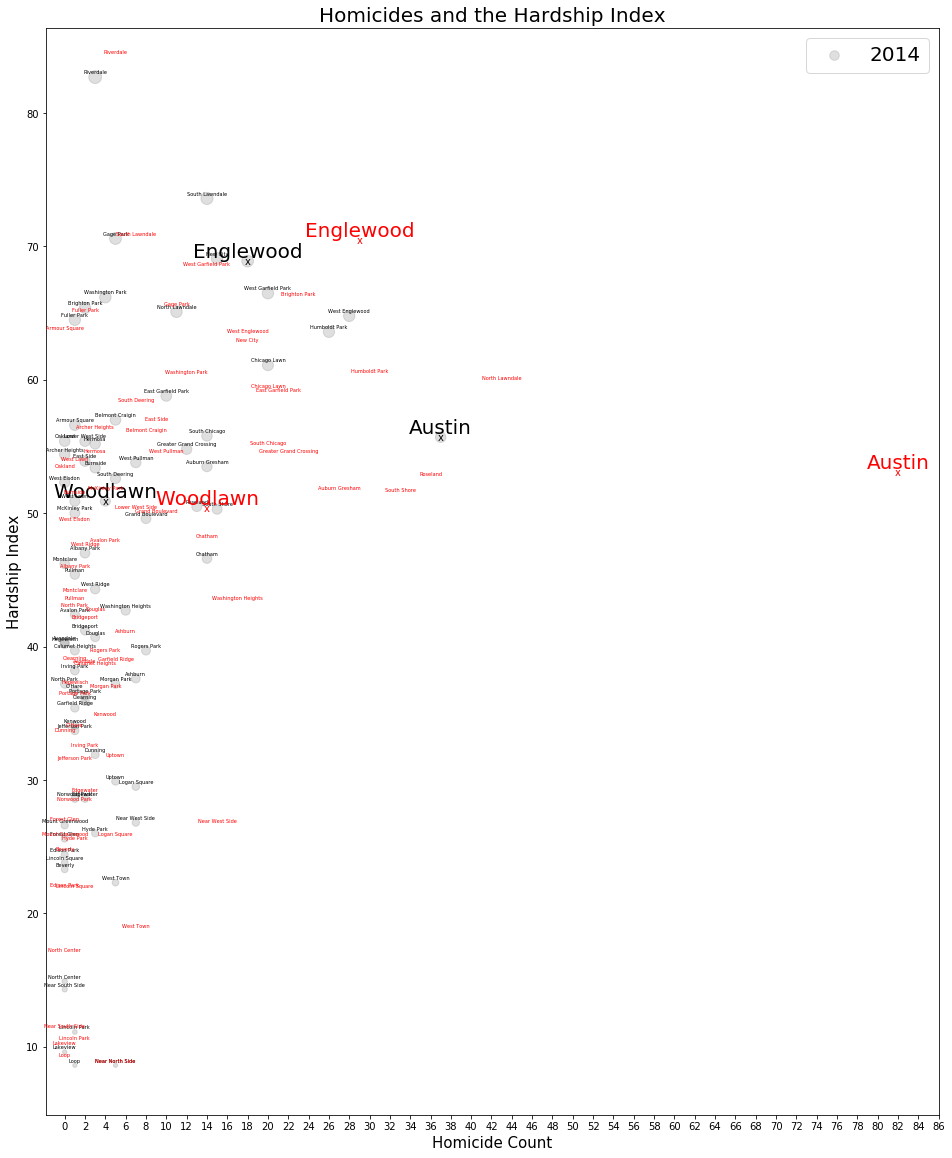

In [19]:
makescatterplot(HI14,HI17,['Woodlawn','Englewood','Austin'],True,"HOM","HI","Homicide Count","Hardship Index",np.arange(0,87,2),"Homicides and the Hardship Index")